# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Done')

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validition examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validition examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

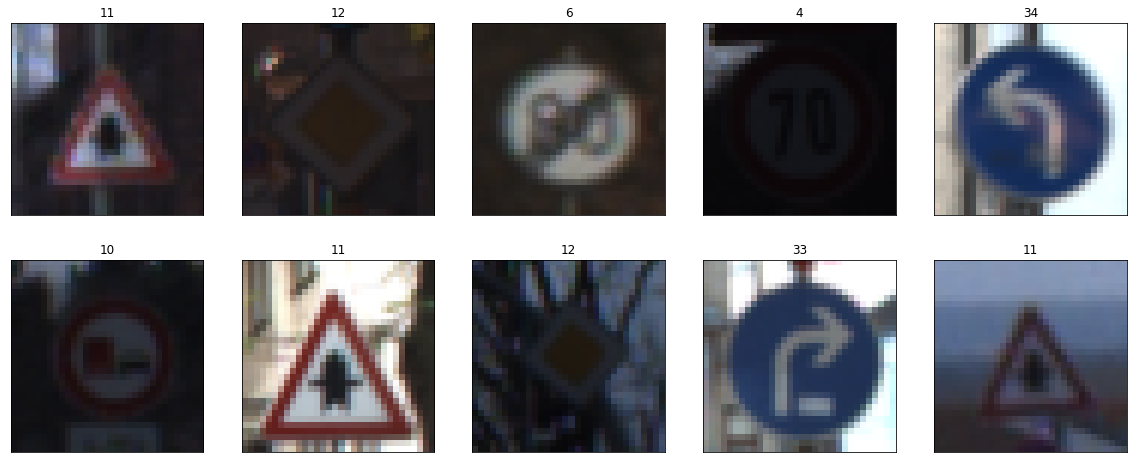

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Plots 10 random images with their corresponding classnumber
fig = plt.figure(figsize=(20, 8))
for i in range(10):
    ind = random.randint(0, len(X_train))
    image = fig.add_subplot(2,5,i+1)
    plt.imshow(X_train[ind])
    # Removing the axis ticks and setting Title to classnumber
    image.set_xticks([])
    image.set_yticks([])
    image.set_title(y_train[ind])

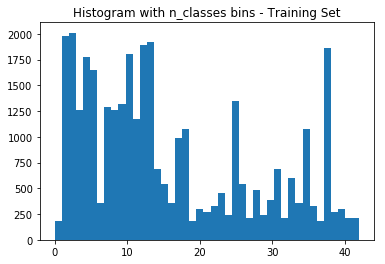

In [4]:
### Historgramm showing the distribution of classes in training set
plt.hist(y_train, bins=n_classes)
plt.title('Histogram with n_classes bins - Training Set')
plt.show()

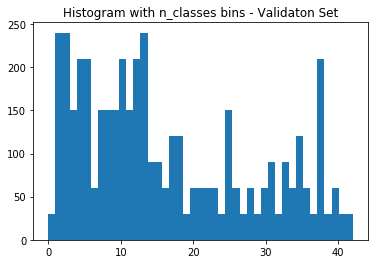

In [5]:
### Historgramm showing the distribution of classes in validation set
plt.hist(y_valid, bins=n_classes)
plt.title('Histogram with n_classes bins - Validaton Set')
plt.show()

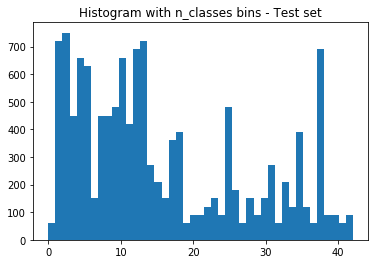

In [6]:
## Historgramm showing the distribution of classes in test set
plt.hist(y_test, bins=n_classes)
plt.title('Histogram with n_classes bins - Test set')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Normalizing Data
X_train = (X_train - np.average(X_train)) / np.std(X_train)
X_valid = (X_valid - np.average(X_valid)) / np.std(X_valid)
X_test = (X_test - np.average(X_test)) / np.std(X_test)

# Conversion to Grayscale 
# formula source: https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
#X_train_gray = np.dot(X_train[...][...,:3],[0.299,0.587,0.114])
#X_test_gray = np.dot(X_test[...][...,:3],[0.299,0.587,0.114])


### Model Architecture

In [8]:
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)

    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2    = tf.nn.relu(fc2)

    #Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Training Pipeline

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print('Done!')

Done!


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [13]:
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy) + 
              " and Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.776 and Training Accuracy = 0.873

EPOCH 2 ...
Validation Accuracy = 0.837 and Training Accuracy = 0.937

EPOCH 3 ...
Validation Accuracy = 0.883 and Training Accuracy = 0.973

EPOCH 4 ...
Validation Accuracy = 0.891 and Training Accuracy = 0.982

EPOCH 5 ...
Validation Accuracy = 0.888 and Training Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.901 and Training Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.892 and Training Accuracy = 0.988

EPOCH 8 ...
Validation Accuracy = 0.897 and Training Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.900 and Training Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.916 and Training Accuracy = 0.996

EPOCH 11 ...
Validation Accuracy = 0.909 and Training Accuracy = 0.985

EPOCH 12 ...
Validation Accuracy = 0.901 and Training Accuracy = 0.990

EPOCH 13 ...
Validation Accuracy = 0.917 and Training Accuracy = 0.997

EPOCH 14 ...
Validation Accuracy = 0.892 and Training Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.918


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

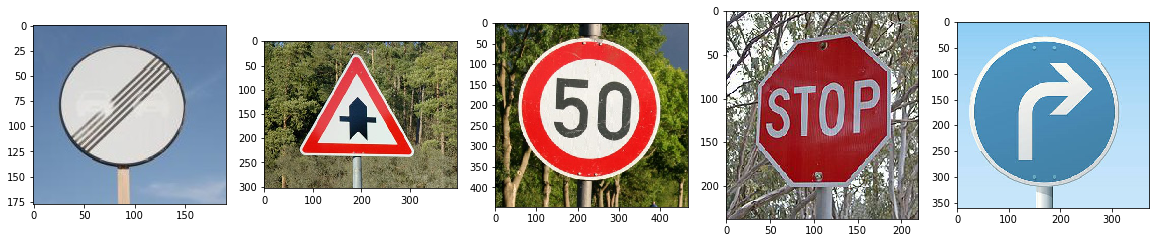

In [75]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

images_dir = os.listdir("test_images/")
correct_labels = [11, 2, 14, 33, 32]
# Plotting the images including lane markings in a 2x3 Plot
fig = plt.figure(figsize=(20, 8))        
for ind, image_dir in enumerate(images_dir):
     img = mpimg.imread(os.path.join("test_images", image_dir))
     fig.add_subplot(1,5,ind+1)
     plt.imshow(img)

### Predict the Sign Type for Each Image and Analyze Performance

In [76]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import cv2

images_res_dir = os.listdir("test_images_resized/")
images = []

for ind, img_dir in enumerate(images_res_dir):
    img = cv2.imread(os.path.join("test_images_resized", img_dir))
    images.append(img)
    
images = np.asarray(images)
#print(images.shape)

images = (images - np.average(images)) / np.std(images)
softmax_logits = tf.nn.softmax(logits) 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred_val = sess.run(softmax_logits, feed_dict={x: images})
    #print(pred_val)
    predicted_labels = np.argmax(pred_val, 1)
    print("predicted labels" , predicted_labels)
    print("correct labels" , correct_labels)
    new_accuracy = evaluate(images, correct_labels)
    print("Test Set Accuracy = {:.3f}".format(new_accuracy))


predicted labels [40  2 34  9 38]
correct labels [11, 2, 14, 33, 32]
Test Set Accuracy = 0.200


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [61]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_5 = tf.nn.top_k(softmax_logits, k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_5 = sess.run(top_5, feed_dict={x: images})
    print(top_5)

TopKV2(values=array([[  9.99896646e-01,   9.44925050e-05,   8.78217543e-06,
          7.85021186e-08,   2.03751283e-09],
       [  9.99987245e-01,   1.18745684e-05,   8.66367145e-07,
          6.29309227e-09,   3.12611977e-14],
       [  9.47909117e-01,   5.20909168e-02,   8.13034884e-09,
          1.06788633e-09,   8.02383049e-10],
       [  6.53967679e-01,   3.10476005e-01,   3.50827202e-02,
          4.61340562e-04,   9.36013839e-06],
       [  9.85814631e-01,   1.20715424e-02,   1.34881982e-03,
          3.54873773e-04,   2.95883015e-04]], dtype=float32), indices=array([[40, 33, 11, 37, 18],
       [ 2,  1, 38, 13,  6],
       [34, 35, 13, 38, 33],
       [ 9, 10, 16, 30,  7],
       [38,  1, 15, 32, 29]]))


([<matplotlib.axis.YTick at 0x1f3a7065080>,
 <a list of 5 Text yticklabel objects>)

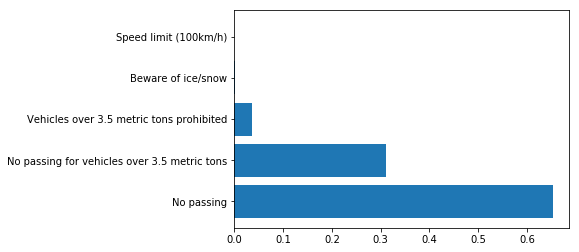

In [74]:
# Plotting a bar chart for the fourth additional image from above 
plt.barh(np.arange(5), top_5.values[3])
#signnames = ['one', 'two', 'three', 'four', 'five']
plt.yticks(np.arange(5), ('No passing', 'No passing for vehicles over 3.5 metric tons',
                          'Vehicles over 3.5 metric tons prohibited', 'Beware of ice/snow',
                          'Speed limit (100km/h)'))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

**Traffic Sign Recognition** 

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/No_speed_limit.jpg "No speed limit"
[image5]: ./examples/Right_of_way.png "Right of Way"
[image6]: ./examples/Speed_Limit_50.jpg "Speed Limit 50"
[image7]: ./examples/stop_sign.jpg "Stop Sign"
[image8]: ./examples/turn_right_ahead.jpg "Turn Right Ahead"
[image9]: ./examples/Traffic_sign_examples.png "10 random images with their corresponding signvalues"
[image10]: ./examples/Distribution_of_classes.png "Distribution of signnames across the training dataset"

## Rubric Points
Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
## Writeup / README

1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/TDorau/self-driving-car-nanodegree/blob/master/2-traffic-sign-classifier/Traffic_Sign_Classifier.ipynb)

Data Set Summary & Exploration

1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used numpy to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32, 32, 3)
* The number of unique classes/labels in the data set is 43

### 2. Include an exploratory visualization of the dataset.

Here is a first exploratory visualization of the data set. You can see some images from the training set with their corresponding labels.

![alt text][image9]

The next chart is a visualization of the distribution of classes in the training set. The traffic signs with higher frequencies should more likely be classified correctly in later stages of this exercise.

![alt text][image10]

Looking at the meaning of each label the signs indicating speed limits as well as those indicating Right-of-Way can be found quite often.

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first try, I decided normalize the data using the Normalization suggested in the text. This didn't lead to the necessary validation set accuracy, so I tried to use Min-Max-Scaling instead. Min-Max-Scaling didn't work good enough as well, so I simply subtracted the average and divided by the in-sample standard deviation, which lead to acceptable validation accuracy. I also wanted to add greyscale conversion because it was suggested in the paper mentioned above, but to keep it as simple as possible I decided to skip that point.

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

I basically used the LeNet Model from the lecture. My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution         	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| Input = 28x28x6, Output = 14x14x6 		    |
| Convolution   	    | 1x1 stride, valid padding, outputs 10x10x16   |
| RELU					|												|
| Max pooling	      	| Input = 10x10x16, outputs 14x14x6 		    |
| Flatten				| Output 400									|
| Fully connected		| Output 120        							|
| RELU					|												|
| Fully connected		| Output 84        							    |
| RELU					|												|
| Fully connected		| Output 43        							    |
 


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used AdamOptimizer to avoid some hyperparameter tuning to achieve the same results with GradientDescentOptimizer at the cost of computational efficiency. I used 128 as Batch size 25 Epochs. I took an iterative approach to figure these values out together with the learning rate. Both higher and lower learning rates than 0.001 lead to worse accuracy. I used my local CPU for training.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy of 0.998
* validation set accuracy of 0.932 
* test set accuracy of 0.918

The gap between training and validation set accuracy is an indicator of over fitting. 

If a well known architecture was chosen:
* What architecture was chosen?
I chose the LeNet Architucture because it worked well on the Mnist Dataset and I believe that the present problem is of similar nature to the one LeNet was originally applied to.
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
Like I already said the model isn't working all too well most likely due to over fitting. A suggestion to improve the model would be to change to preprocessing routine by using greyscale and using dropout as an addition to the model architecture.
 

Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

![alt text][image4] ![alt text][image5] ![alt text][image6] 
![alt text][image7] ![alt text][image8]

Image 4 and 5 should be easy to classify because of the background color. In images 1 to 3 there is forrest and snow in the background and the signs themselves are tilted quite a bit but Images 1 and 2 are two of the signs with the highest frequency in the training data so as a result the model should be able to classify 1 and 2. I guess image 3 has the lowest chances to be classified correctly.

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Right of Way      	| Roundabout mandatory  					    | 
| Speed Limit 50     	| Speed Limit 50 								|
| Stop Sign				| Turn left ahead								|
| Turn Right Ahead	    | No passing					 				|
| No speed limit		| Keep right      							    |

The model was able to correctly guess 1 of the 5 traffic signs, which gives an accuracy of 20%. This is far worse than expected. 91.4% training accuray means that at least 4 or even 5 right predictions should be expected. I guess this is again related to over fitting and due to my image choice.

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is absolutely sure that this is a stop sign (probability of 0.99). The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 9.99896646e-01        | Roundabout mandatory   						| 
| 9.44925050e-05        | Turn right ahead 								|
| 8.78217543e-06		| Right-of-way at the next intersection			|
| 7.85021186e-08	    | Go straight or left					 		|
| 2.03751283e-09		| ,General caution      						|

Second image: First and second are both Speed limits, which is a good result. The model ist 99.99% certain.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 9.99987245e-01        | Speed limit (50km/h)   						| 
| 1.18745684e-05        | Speed limit (30km/h) 							|
| 8.66367145e-07		| Keep right			                        |
| 6.29309227e-09	    | Yield					 		                |
| 3.12611977e-14		| End of speed limit (80km/h)      				|

Third image: This is supposed to be a stop sign...

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 9.47909117e-01        | Turn left ahead   						    | 
| 5.20909168e-02        | Ahead only 							        |
| 8.13034884e-09		| Yield			                                |
| 1.06788633e-09	    | Keep right					 		        |
| 8.02383049e-10		| Turn right ahead      				        |

Fourth image: Model is quite unsure about the prediction.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 6.53967679e-01        | No passing   						            | 
| 3.10476005e-01        | No passing for vehicles over 3.5 metric tons  |
| 3.50827202e-02		| Vehicles over 3.5 metric tons prohibited		|
| 4.61340562e-04	    | Beware of ice/snow					 		|
| 9.36013839e-06		| Speed limit (100km/h)      				    |

Fifth image: Quite certain but wrong.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 9.85814631e-01        | keep right   						            | 
| 1.20715424e-02        | Speed limit (30km/h)                          |
| 1.34881982e-03		| No vehicles		                            |
| 3.54873773e-04	    | End of all speed and passing limits	        |
| 2.95883015e-04		| Bicycles crossing      				        |

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")